<a href="https://colab.research.google.com/github/duyhung112/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#load dữ liệu
df = pd.read_csv("/content/Mall_Customers.csv")

**KIỂM TRA CÁC CÁC THÔNG SỐ CƠ BẢN CỦA DỮ LIỆU**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
df.shape

(200, 5)

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [67]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Hiểu về dữ liệu:**
1.   Dữ liệu có 5 thuộc tính cơ bản

      *   CustomerID: ID khách hàng
      *   Gender: Giới tính
      *   Age: Tuổi
      *   Annual Income (k$): Thu nhập hàng năm(ngàn dolar)
      *   Spending Score (1-100): Điểm chỉ tiêu
2.   Dữ liệu có 200 dòng và 5 cột
3.   Dữ liệu không có giá trị bị thiếu hay chứa giá trị NaN.



In [68]:
#xóa dữ liệu không cần thiết
df.drop(columns=['CustomerID'],inplace=True)

In [69]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**TRỰC QUAN HÓA DỮ LIỆU**

**ĐỘ TƯƠNG QUAN GIỮA CÁC BIẾN**

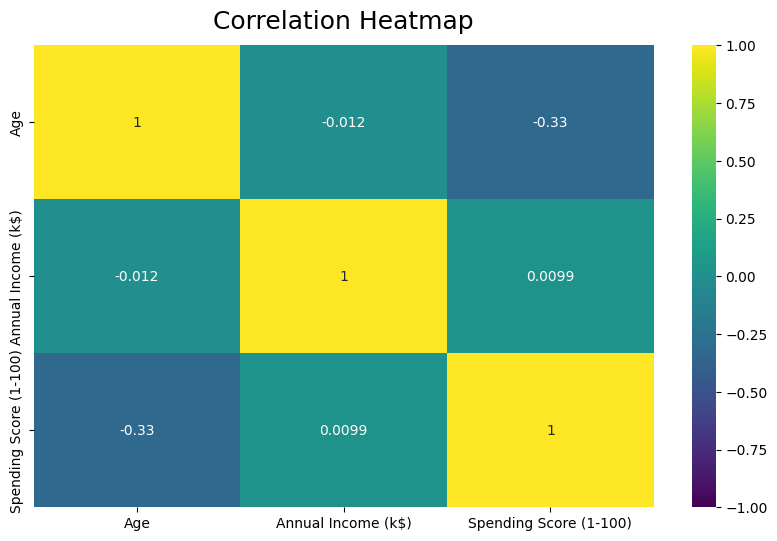

In [70]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Kết quả của heatmap này cho thấy rằng thu nhập hàng năm và điểm chi tiêu có mối liên hệ chặt chẽ hơn so với tuổi tác và điểm chi tiêu. Điều này có nghĩa là thu nhập hàng năm là yếu tố quan trọng hơn trong việc xác định điểm chi tiêu của một người.

**Phân bố của 3 thuộc tính: tuổi, thu nhập hằng năm và điểm chi tiêu**

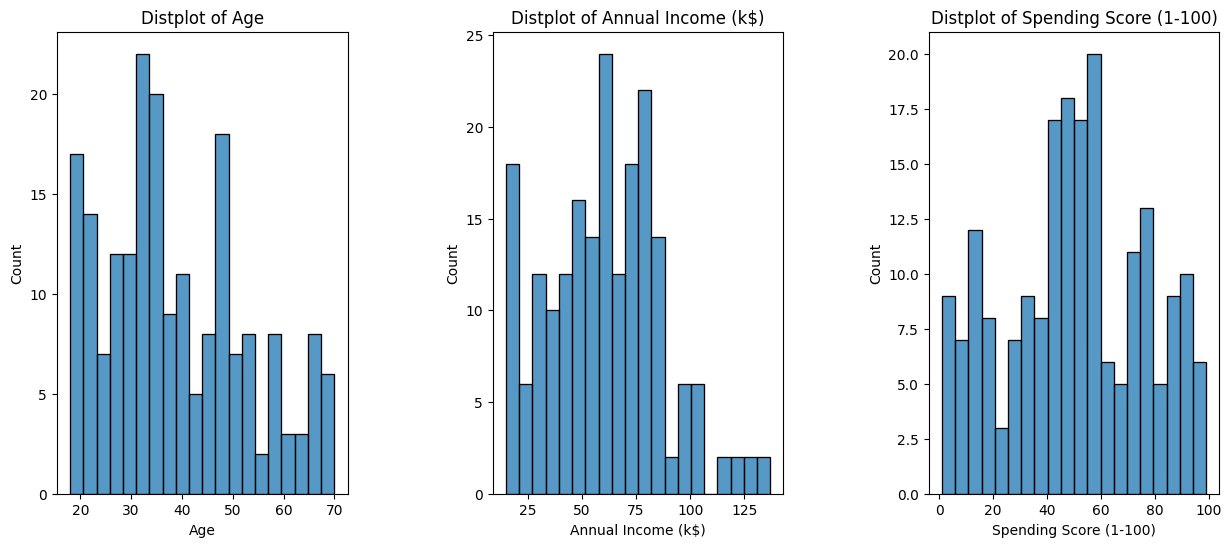

In [71]:
plt.figure(figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

Phân bố độ tuổi của khách hàng

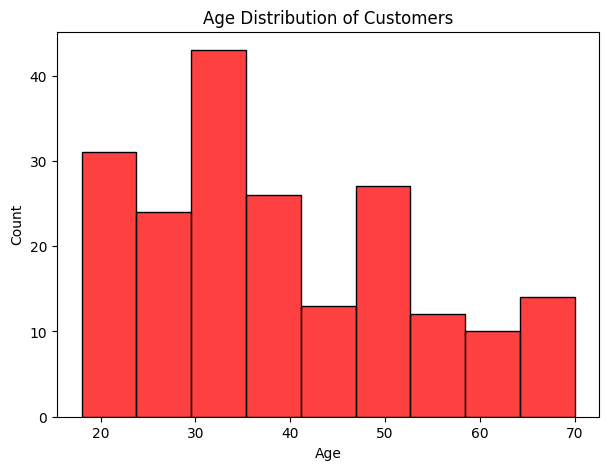

In [72]:
plt.figure(figsize=(7,5),dpi=100)
sns.histplot(data=df,x="Age",color="red")
plt.title("Age Distribution of Customers")
plt.show()

Biểu đồ thể hiện rõ ràng: Những người có điểm chi tiêu lớn hơn > 50 là những người trẻ => Người trẻ yêu thích việc mua sắm.

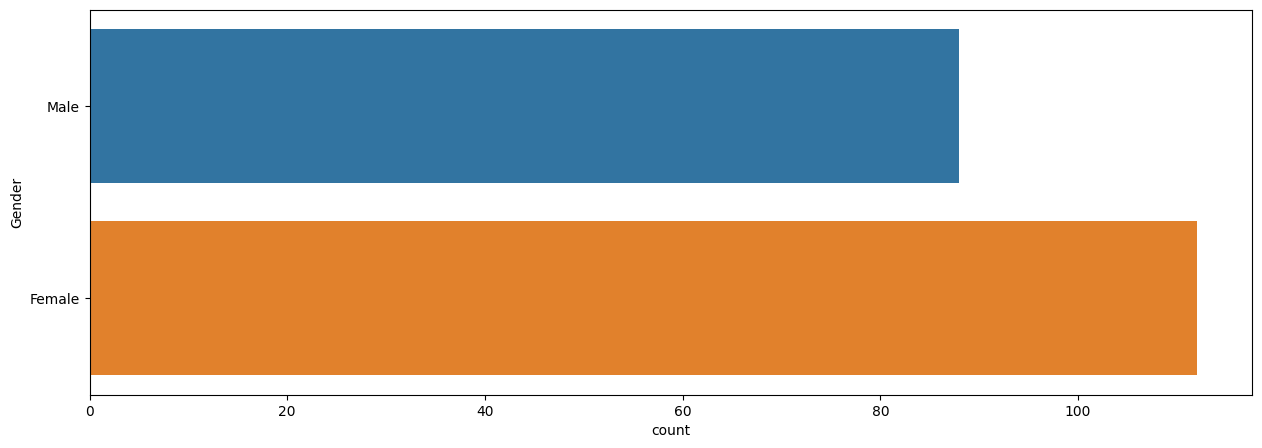

In [73]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Khách hàng có giới tính Nữ thường mua hàng nhiều hơn khách hàng giới tính Nam.

<ipython-input-74-85a1fcc8cb3b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender',data=df,ci=False,style='Gender',markers=True)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

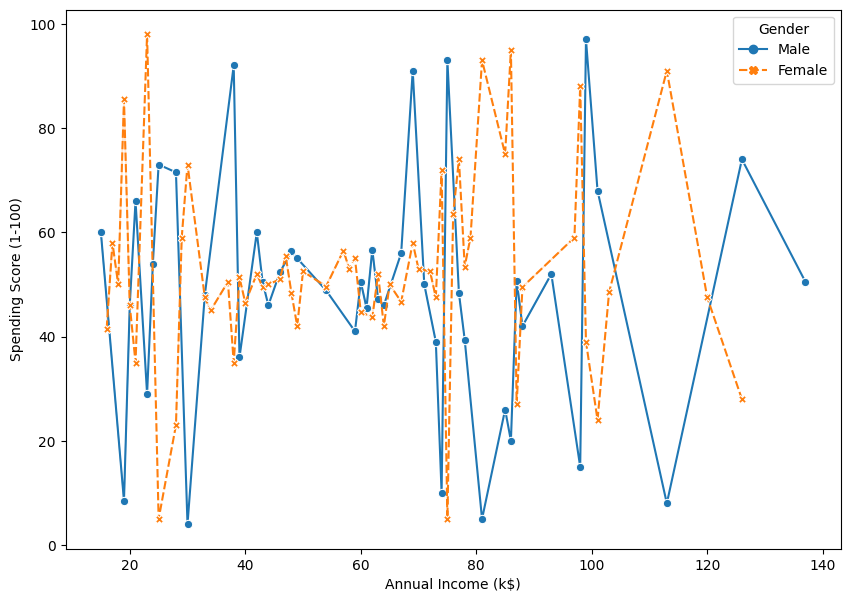

In [74]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender',data=df,ci=False,style='Gender',markers=True)

Biểu đồ cho thấy quan hệ giữa thu nhập hằng năm và điểm chi tiêu của giới tính nam và nữ.
*   Nam giới có điểm thu nhập cao hơn và cũng có mức chi tiêu khá cao.
*   Nữ có mức thu nhập thấp hơn và đồng thời chi tiêu cũng tương đương so với  Nam.



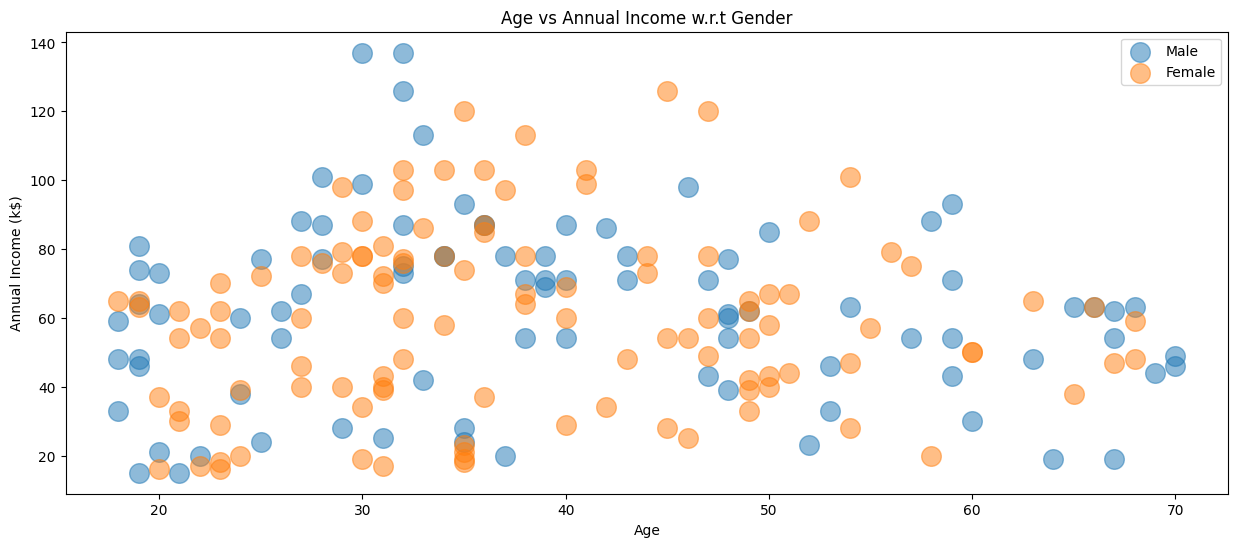

In [75]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Biểu đồ cho thấy một biểu đồ phân tán thể hiện mối quan hệ giữa tuổi và thu nhập hàng năm của nam và nữ. Biểu đồ cho thấy rằng cả nam và nữ đều có mối tương quan dương giữa tuổi và thu nhập hàng năm. Điều này có nghĩa là những người lớn tuổi hơn có xu hướng có thu nhập cao hơn. Tuy nhiên, thu nhập hàng năm của nam giới cao hơn thu nhập hàng năm của nữ giới ở tất cả các độ tuổi.

**PHÂN CỤM VỚI K-MEAN**

In [83]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi giới tính thành dạng số (1 cho Male, 0 cho Female)
genders = label_encoder.fit_transform(df['Gender'])
df['genders'] = genders

#thực hiện xóa đi thuộc tính Gender sau khi đã được chuẩn hóa
df.drop(columns=['Gender'], inplace =True)

In [84]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),genders
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

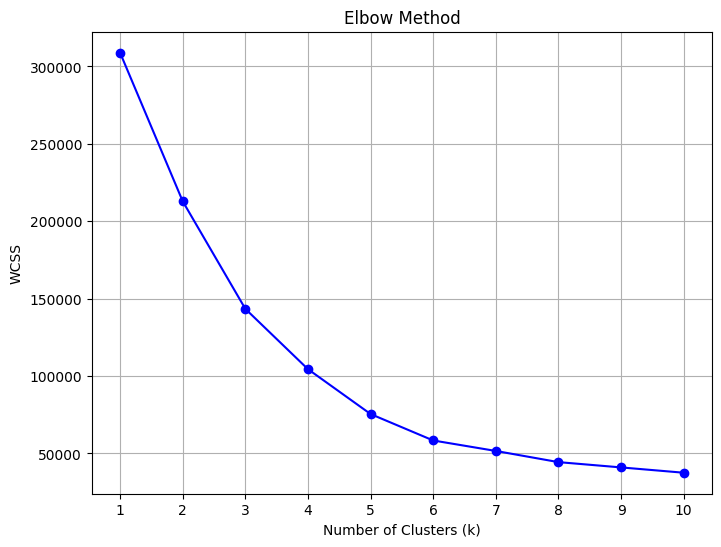

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have data as 'data' (similar to the previous example)

wcss = []  # Within-cluster sum of squares

# Calculate WCSS for different values of k (number of clusters)
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


For n_clusters = 2, the average silhouette score is: 0.293166070535953
For n_clusters = 3, the average silhouette score is: 0.3839349967742105
For n_clusters = 4, the average silhouette score is: 0.40546302077733304
For n_clusters = 5, the average silhouette score is: 0.44446409171786105
For n_clusters = 6, the average silhouette score is: 0.4523566166018854
For n_clusters = 7, the average silhouette score is: 0.4398198217929885
For n_clusters = 8, the average silhouette score is: 0.42977587111050725
For n_clusters = 9, the average silhouette score is: 0.41443894953771165
For n_clusters = 10, the average silhouette score is: 0.3771617663736055


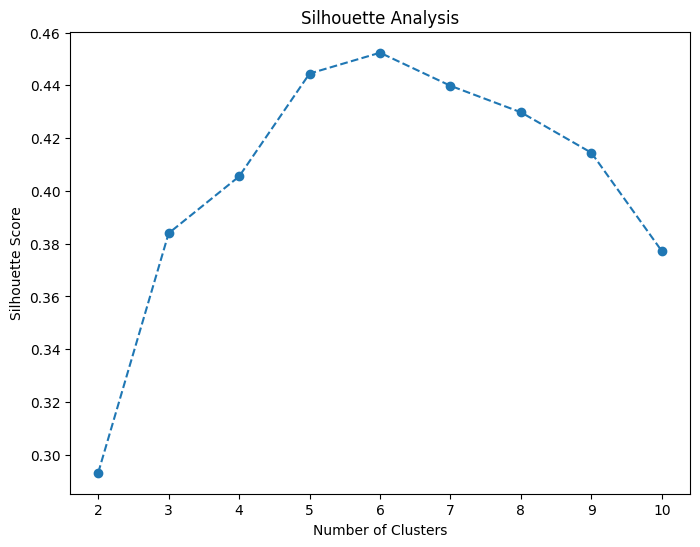

In [88]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

K = 6 đạt chỉ số cao nhất

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


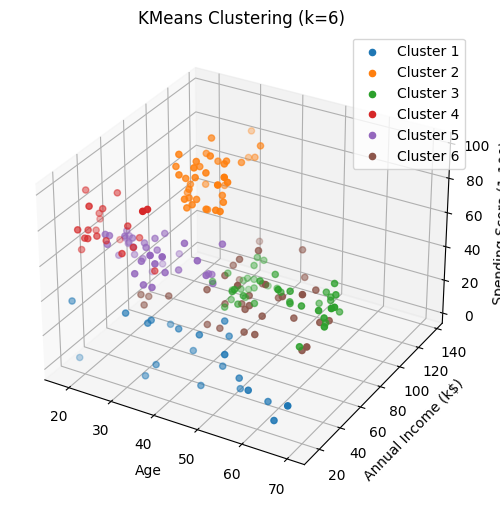

In [90]:
# Áp dụng thuật toán KMeans với k=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X)

# Lấy các nhãn cụm cho mỗi điểm dữ liệu
labels = kmeans.labels_

# Vẽ biểu đồ phân cụm 3D nếu có 3 thuộc tính
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm dữ liệu theo cụm
for i in range(6):  # Với k=6 clusters
    ax.scatter(X.values[labels == i, 0],
               X.values[labels == i, 1],
               X.values[labels == i, 2],
               label=f'Cluster {i + 1}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('KMeans Clustering (k=6)')
ax.legend()
plt.show()


**Nhận Xét:**
Kết quả của biểu đồ này cho thấy rằng có sự khác biệt đáng kể về các đặc điểm của các cụm. Cụ thể, các cụm có thể được phân loại thành các nhóm sau:

* Cụm 1: Những người trẻ tuổi, có thu nhập thấp và điểm chi tiêu thấp.
* Cụm 2: Những người trung niên, có thu nhập trung bình và điểm chi tiêu trung bình.
* Cụm 3: Những người trung niên, có thu nhập cao và điểm chi tiêu cao.
* Cụm 4: Những người lớn tuổi, có thu nhập thấp và điểm chi tiêu thấp.
* Cụm 5: Những người lớn tuổi, có thu nhập trung bình và điểm chi tiêu trung bình.
* Cụm 6: Những người lớn tuổi, có thu nhập cao và điểm chi tiêu cao.